In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [83]:
data = pd.read_csv("churn_data.csv")

In [38]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,NaN,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,NaN,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,NaN,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,NaN,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,NaN,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,NaN,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,NaN,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,NaN,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,NaN,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [39]:
# Размерность данных
print("Размерность данных:", data.shape)

Размерность данных: (7042, 22)


In [40]:
# Типы данных
print('Типы данных:', data.dtypes)

Типы данных: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Unnamed: 13         float64
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [41]:
# Проверка наличия пропусков
print("Пропуски в данных:\n", data.isnull().sum())

Пропуски в данных:
 customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Unnamed: 13         7042
tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


In [85]:
encdata = pd.get_dummies(data)
encdata

,SeniorCitizen,Unnamed: 13,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,NaN,1,29.85,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,NaN,34,56.95,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,NaN,2,53.85,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,NaN,45,42.30,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,NaN,2,70.70,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,NaN,72,21.15,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7038,0,NaN,24,84.80,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7039,0,NaN,72,103.20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7040,0,NaN,11,29.60,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [82]:
# Закодируем категориальные переменные, если они есть
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5374,0,0,1,0,1,0,0,2,0,...,0,0,1,0,0,1,2,29.85,2505,0
1,3961,1,0,0,0,0,0,2,0,2,...,0,0,34,1,1,0,3,56.95,1466,0
2,2563,1,0,0,0,0,0,2,2,0,...,0,0,2,1,0,1,3,53.85,157,1
3,5534,1,0,0,0,1,0,2,0,2,...,0,0,45,0,1,0,0,42.30,1400,0
4,6510,0,0,0,0,0,1,0,0,0,...,0,0,2,1,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,0,0,2,1,1,1,...,1,1,72,1,2,1,0,21.15,770,0
7038,4852,1,0,1,1,2,0,2,0,2,...,2,2,24,1,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,2,1,0,2,2,...,2,2,72,1,1,1,1,103.20,5697,0
7040,3366,0,0,1,1,1,0,2,0,0,...,0,0,11,0,0,1,2,29.60,2994,0


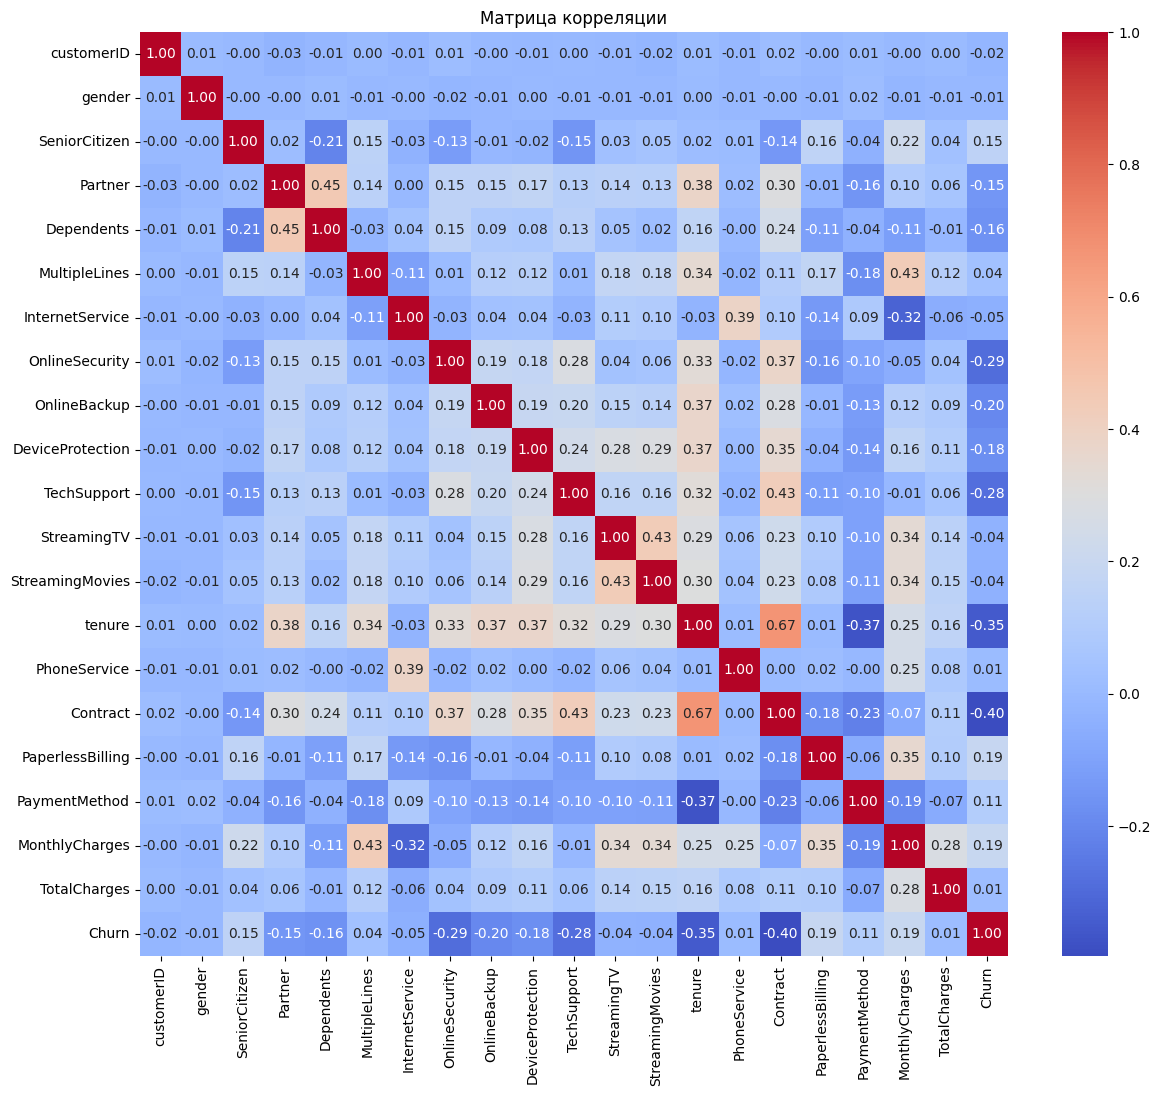

In [78]:
# Матрица корреляции
plt.figure(figsize=(14, 12.))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

In [ ]:
print("Количество уникальных значений в категориальных переменных:")
for col in data.select_dtypes(include=['object']).columns:
    print(col, ":", data[col].nunique())

Количество уникальных значений в категориальных переменных:
customerID : 7042
gender : 2
Partner : 2
Dependents : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
PhoneService : 2
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
TotalCharges : 6530
Churn : 2


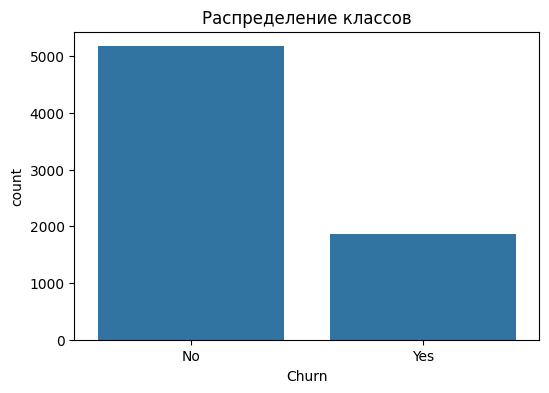

In [ ]:
# Проверка баланса классов
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Распределение классов')
plt.show()

In [55]:
# Разделение на признаки и целевую переменную
X = data.drop(columns=['Churn'])
y = data['Churn']

In [57]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Реализация логистической регрессии
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [74]:
# Вывод коэффициентов уравнения
log_reg.coef_



array([[-4.69064506e-05, -9.15884783e-02,  3.00884613e-01,
         1.47285789e-02, -3.45586808e-01,  1.03924629e-01,
         9.45517522e-02, -2.68428548e-01, -1.13602233e-01,
        -6.84164150e-02, -2.59125328e-01, -3.33004986e-03,
         5.62576785e-02, -3.07815479e-02, -6.54977541e-01,
        -8.86701425e-01,  3.73167680e-01,  4.22103270e-03,
         2.10447525e-02,  3.37247430e-05]])

In [68]:
y_pred = log_reg.predict(X_test)

In [72]:
# Оценка модели
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1soce = f1_score(y_test, y_pred)
press = precision_score(y_test, y_pred)


In [73]:
# Вывод метрик и матрицы ошибок
print("Accuracy:", accuracy)
print("recall:", recall)
print("f1score:", f1soce)
print("precision:", press)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.801277501774308
recall: 0.5603217158176944
f1score: 0.5988538681948424
precision: 0.6430769230769231

Confusion Matrix:
[[920 116]
 [164 209]]
